In [13]:
import numpy as np 
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from datetime import datetime
import json

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from __future__ import print_function
import time
import cfbd
from cfbd.rest import ApiException
from pprint import pprint

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [14]:
# Configure API key authorization: ApiKeyAuth
configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = YOUR AUTH KEY GOES HERE - FIND AT COLLEGEFOOTBALLDATA.COM
# Uncomment below to setup prefix (e.g. Bearer) for API key, if needed
configuration.api_key_prefix['Authorization'] = 'Bearer'

In [31]:
# create an instance of the API class
api_instance = cfbd.PlaysApi(cfbd.ApiClient(configuration))
year = 2024 # int | Year filter
week = 5 # int | Week filter (required if team, offense, or defense, not specified)
#season_type = 'regular' # str | Season type filter (optional) (default to regular)
#team = 'team_example' # str | Team filter (optional)
#offense = 'offense_example' # str | Offensive team filter (optional)
defense = 'Penn State' # str | Defensive team filter (optional)
#conference = 'conference_example' # str | Conference filter (optional)
#offense_conference = 'offense_conference_example' # str | Offensive conference filter (optional)
#defense_conference = 'defense_conference_example' # str | Defensive conference filter (optional)
#play_type = 56 # int | Play type filter (optional)
#classification = 'classification_example' # str | Division classification filter (fbs/fcs/ii/iii) (optional)

try:
    # Play by play data
    wk4_pbp_response = api_instance.get_plays(year=year, week=week, defense=defense)
    pprint(wk4_pbp_response)
except ApiException as e:
    print("Exception when calling PlaysApi->get_plays: %s\n" % e)

[{'away': 'Illinois',
 'clock': {'minutes': 14, 'seconds': 58},
 'defense': 'Penn State',
 'defense_conference': 'Big Ten',
 'defense_score': 0,
 'defense_timeouts': 3,
 'distance': 10,
 'down': 1,
 'drive_id': 4016284951,
 'drive_number': 1,
 'game_id': 401628495,
 'home': 'Penn State',
 'id': 401628495101854101,
 'offense': 'Illinois',
 'offense_conference': 'Big Ten',
 'offense_score': 0,
 'offense_timeouts': 3,
 'period': 1,
 'play_number': 2,
 'play_text': 'Kaden Feagin run for a loss of 1 yard to the ILL 24',
 'play_type': 'Rush',
 'ppa': -0.8014893508157099,
 'scoring': False,
 'wallclock': '2024-09-28T23:32:28.000Z',
 'yard_line': 75,
 'yards_gained': -1,
 'yards_to_goal': 75},
 {'away': 'Illinois',
 'clock': {'minutes': 14, 'seconds': 26},
 'defense': 'Penn State',
 'defense_conference': 'Big Ten',
 'defense_score': 0,
 'defense_timeouts': 3,
 'distance': 11,
 'down': 2,
 'drive_id': 4016284951,
 'drive_number': 1,
 'game_id': 401628495,
 'home': 'Penn State',
 'id': 401628495

In [43]:
ill = pd.DataFrame.from_records([dict(
    offense=i.offense,
    defense=i.defense,
    drive_id=i.drive_id,
    drive_number=i.drive_number,
    quarter=i.period,
    play_number=i.play_number,
    down=i.down,
    distance=i.distance,
    ppa=i.ppa,
    desc=i.play_text
)for i in wk4_pbp_response])
ill.head()

,offense,defense,drive_id,drive_number,quarter,play_number,down,distance,ppa,desc
0,Illinois,Penn State,4016284951,1,1,2,1,10,-0.801489,Kaden Feagin run for a loss of 1 yard to the I...
1,Illinois,Penn State,4016284951,1,1,3,2,11,0.036296,Kaden Feagin run for 5 yds to the ILL 29
2,Illinois,Penn State,4016284951,1,1,4,3,6,2.281245,Luke Altmyer pass complete to Zakhari Franklin...
3,Illinois,Penn State,4016284951,1,1,5,1,10,-0.925805,Kaden Feagin run for 1 yd to the ILL 43
4,Illinois,Penn State,4016284951,1,1,6,2,9,2.347070,Luke Altmyer pass complete to Zakhari Franklin...


In [44]:
ill.shape

(83, 10)

In [87]:
ill = ill.dropna(subset=['ppa']).reset_index()
ill.shape

(56, 11)

In [88]:
ill = ill[['offense', 'defense', 'ppa']].reset_index().rename(columns={'index': 'play_num'})
ill

,play_num,offense,defense,ppa
0,0,Illinois,Penn State,-0.801489
1,1,Illinois,Penn State,0.036296
2,2,Illinois,Penn State,2.281245
3,3,Illinois,Penn State,-0.925805
4,4,Illinois,Penn State,2.347070
5,5,Illinois,Penn State,0.258294
6,6,Illinois,Penn State,0.118130
7,7,Illinois,Penn State,-0.018311
8,8,Illinois,Penn State,-0.326629
9,9,Illinois,Penn State,1.205033


In [81]:
# create an instance of the API class
api_instance = cfbd.PlaysApi(cfbd.ApiClient(configuration))
year = 2024 # int | Year filter
week = 4 # int | Week filter (required if team, offense, or defense, not specified)
#season_type = 'regular' # str | Season type filter (optional) (default to regular)
#team = 'team_example' # str | Team filter (optional)
#offense = 'offense_example' # str | Offensive team filter (optional)
defense = 'Penn State' # str | Defensive team filter (optional)
#conference = 'conference_example' # str | Conference filter (optional)
#offense_conference = 'offense_conference_example' # str | Offensive conference filter (optional)
#defense_conference = 'defense_conference_example' # str | Defensive conference filter (optional)
#play_type = 56 # int | Play type filter (optional)
#classification = 'classification_example' # str | Division classification filter (fbs/fcs/ii/iii) (optional)

try:
    # Play by play data
    wk3_pbp_response = api_instance.get_plays(year=year, week=week, defense=defense)
    pprint(wk3_pbp_response)
except ApiException as e:
    print("Exception when calling PlaysApi->get_plays: %s\n" % e)

[{'away': 'Kent State',
 'clock': {'minutes': 14, 'seconds': 58},
 'defense': 'Penn State',
 'defense_conference': 'Big Ten',
 'defense_score': 0,
 'defense_timeouts': 3,
 'distance': 10,
 'down': 1,
 'drive_id': 4016284931,
 'drive_number': 1,
 'game_id': 401628493,
 'home': 'Penn State',
 'id': 401628493101854101,
 'offense': 'Kent State',
 'offense_conference': 'Mid-American',
 'offense_score': 0,
 'offense_timeouts': 3,
 'period': 1,
 'play_number': 2,
 'play_text': 'Devin Kargman pass incomplete',
 'play_type': 'Pass Incompletion',
 'ppa': -1.0146424556055624,
 'scoring': False,
 'wallclock': '2024-09-21T19:38:36.000Z',
 'yard_line': 65,
 'yards_gained': 0,
 'yards_to_goal': 65},
 {'away': 'Kent State',
 'clock': {'minutes': 14, 'seconds': 55},
 'defense': 'Penn State',
 'defense_conference': 'Big Ten',
 'defense_score': 0,
 'defense_timeouts': 3,
 'distance': 10,
 'down': 2,
 'drive_id': 4016284931,
 'drive_number': 1,
 'game_id': 401628493,
 'home': 'Penn State',
 'id': 40162849

In [82]:
kent = pd.DataFrame.from_records([dict(
    offense=i.offense,
    defense=i.defense,
    drive_id=i.drive_id,
    drive_number=i.drive_number,
    quarter=i.period,
    play_number=i.play_number,
    down=i.down,
    distance=i.distance,
    ppa=i.ppa,
    desc=i.play_text
)for i in wk3_pbp_response])
kent.head(10)

,offense,defense,drive_id,drive_number,quarter,play_number,down,distance,ppa,desc
0,Kent State,Penn State,4016284931,1,1,2,1,10,-1.014642,Devin Kargman pass incomplete
1,Kent State,Penn State,4016284931,1,1,3,2,10,-0.756556,Devin Kargman sacked for a loss of 2 yards to ...
2,Kent State,Penn State,4016284931,1,1,4,3,12,-0.219338,Jordan Lowe run for no gain to the KENT 33
3,Kent State,Penn State,4016284931,1,1,5,4,12,NaN,Josh Smith punt for 43 yds
4,Kent State,Penn State,4016284932,2,1,10,1,10,NaN,"(09:21) QB Keeper SHERROD, JD rush up the midd..."
5,Kent State,Penn State,4016284933,3,1,1,1,5,-0.481877,Ky Thomas run for 6 yds to the PSU 48 for a 1S...
6,Kent State,Penn State,4016284933,3,1,2,1,10,-1.074300,JD Sherrod pass incomplete
7,Kent State,Penn State,4016284933,3,1,3,2,10,-0.628551,JD Sherrod run for 2 yds to the PSU 46
8,Kent State,Penn State,4016284933,3,1,4,3,8,-0.910668,JD Sherrod pass incomplete
9,Kent State,Penn State,4016284933,3,1,5,4,8,NaN,Josh Smith punt for 35 yds


In [83]:
kent.shape

(65, 10)

In [84]:
kent = kent.dropna(subset=['ppa']).reset_index()
kent.shape

(43, 11)

In [85]:
kent = kent[['offense', 'defense', 'ppa']].reset_index().rename(columns={'index': 'play_num'})
kent

,play_num,offense,defense,ppa
0,0,Kent State,Penn State,-1.014642
1,1,Kent State,Penn State,-0.756556
2,2,Kent State,Penn State,-0.219338
3,3,Kent State,Penn State,-0.481877
4,4,Kent State,Penn State,-1.074300
5,5,Kent State,Penn State,-0.628551
6,6,Kent State,Penn State,-0.910668
7,7,Kent State,Penn State,1.339432
8,8,Kent State,Penn State,-1.396611
9,9,Kent State,Penn State,1.270792


In [35]:
# create an instance of the API class
api_instance = cfbd.PlaysApi(cfbd.ApiClient(configuration))
year = 2024 # int | Year filter
week = 2 # int | Week filter (required if team, offense, or defense, not specified)
#season_type = 'regular' # str | Season type filter (optional) (default to regular)
#team = 'team_example' # str | Team filter (optional)
#offense = 'offense_example' # str | Offensive team filter (optional)
defense = 'Penn State' # str | Defensive team filter (optional)
#conference = 'conference_example' # str | Conference filter (optional)
#offense_conference = 'offense_conference_example' # str | Offensive conference filter (optional)
#defense_conference = 'defense_conference_example' # str | Defensive conference filter (optional)
#play_type = 56 # int | Play type filter (optional)
#classification = 'classification_example' # str | Division classification filter (fbs/fcs/ii/iii) (optional)

try:
    # Play by play data
    wk2_pbp_response = api_instance.get_plays(year=year, week=week, defense=defense)
    pprint(wk2_pbp_response)
except ApiException as e:
    print("Exception when calling PlaysApi->get_plays: %s\n" % e)

[{'away': 'Bowling Green',
 'clock': {'minutes': 15, 'seconds': 0},
 'defense': 'Penn State',
 'defense_conference': 'Big Ten',
 'defense_score': 0,
 'defense_timeouts': 3,
 'distance': 10,
 'down': 1,
 'drive_id': 4016284701,
 'drive_number': 1,
 'game_id': 401628470,
 'home': 'Penn State',
 'id': 401628470101849905,
 'offense': 'Bowling Green',
 'offense_conference': 'Mid-American',
 'offense_score': 0,
 'offense_timeouts': 3,
 'period': 1,
 'play_number': 2,
 'play_text': 'Connor Bazelak pass complete to Harold Fannin Jr. for 30 yds to '
              'the PSU 45 for a 1ST down',
 'play_type': 'Pass Reception',
 'ppa': 2.6012410346542536,
 'scoring': False,
 'wallclock': '2024-09-07T16:00:42.000Z',
 'yard_line': 75,
 'yards_gained': 30,
 'yards_to_goal': 75},
 {'away': 'Bowling Green',
 'clock': {'minutes': 15, 'seconds': 0},
 'defense': 'Penn State',
 'defense_conference': 'Big Ten',
 'defense_score': 0,
 'defense_timeouts': 3,
 'distance': 10,
 'down': 1,
 'drive_id': 4016284701,


In [37]:
bowl = pd.DataFrame.from_records([dict(
    offense=i.offense,
    defense=i.defense,
    drive_id=i.drive_id,
    drive_number=i.drive_number,
    quarter=i.period,
    play_number=i.play_number,
    down=i.down,
    distance=i.distance,
    ppa=i.ppa,
    desc=i.play_text
)for i in wk2_pbp_response])
bowl.head()

,offense,defense,drive_id,drive_number,quarter,play_number,down,distance,ppa,desc
0,Bowling Green,Penn State,4016284701,1,1,2,1,10,2.601241,Connor Bazelak pass complete to Harold Fannin ...
1,Bowling Green,Penn State,4016284701,1,1,3,1,10,-0.116203,Justin Pegues run for 4 yds to the PSU 41
2,Bowling Green,Penn State,4016284701,1,1,4,2,6,-1.042562,Connor Bazelak pass incomplete
3,Bowling Green,Penn State,4016284701,1,1,5,3,6,1.662690,Connor Bazelak pass complete to Malcolm Johnso...
4,Bowling Green,Penn State,4016284701,1,1,6,1,10,0.920099,Connor Bazelak pass complete to Malcolm Johnso...


In [41]:
bowl.shape

(90, 10)

In [65]:
bowl = bowl.dropna(subset=['ppa']).reset_index()
bowl.shape

(66, 11)

In [75]:
bowl = bowl[['offense', 'defense', 'ppa']].reset_index().rename(columns={'index': 'play_num'})
bowl

,play_num,offense,defense,ppa
0,0,Bowling Green,Penn State,2.601241
1,1,Bowling Green,Penn State,-0.116203
2,2,Bowling Green,Penn State,-1.042562
3,3,Bowling Green,Penn State,1.662690
4,4,Bowling Green,Penn State,0.920099
5,5,Bowling Green,Penn State,2.052490
6,6,Bowling Green,Penn State,-0.452604
7,7,Bowling Green,Penn State,2.065042
8,8,Bowling Green,Penn State,0.391649
9,9,Bowling Green,Penn State,0.530381


In [38]:
# create an instance of the API class
api_instance = cfbd.PlaysApi(cfbd.ApiClient(configuration))
year = 2024 # int | Year filter
week = 1 # int | Week filter (required if team, offense, or defense, not specified)
#season_type = 'regular' # str | Season type filter (optional) (default to regular)
#team = 'team_example' # str | Team filter (optional)
#offense = 'offense_example' # str | Offensive team filter (optional)
defense = 'Penn State' # str | Defensive team filter (optional)
#conference = 'conference_example' # str | Conference filter (optional)
#offense_conference = 'offense_conference_example' # str | Offensive conference filter (optional)
#defense_conference = 'defense_conference_example' # str | Defensive conference filter (optional)
#play_type = 56 # int | Play type filter (optional)
#classification = 'classification_example' # str | Division classification filter (fbs/fcs/ii/iii) (optional)

try:
    # Play by play data
    wk1_pbp_response = api_instance.get_plays(year=year, week=week, defense=defense)
    pprint(wk1_pbp_response)
except ApiException as e:
    print("Exception when calling PlaysApi->get_plays: %s\n" % e)

[{'away': 'Penn State',
 'clock': {'minutes': 15, 'seconds': 0},
 'defense': 'Penn State',
 'defense_conference': 'Big Ten',
 'defense_score': 0,
 'defense_timeouts': 3,
 'distance': 10,
 'down': 1,
 'drive_id': 4016284571,
 'drive_number': 1,
 'game_id': 401628457,
 'home': 'West Virginia',
 'id': 401628457101849907,
 'offense': 'West Virginia',
 'offense_conference': 'Big 12',
 'offense_score': 0,
 'offense_timeouts': 3,
 'period': 1,
 'play_number': 2,
 'play_text': 'Garrett Greene pass incomplete',
 'play_type': 'Pass Incompletion',
 'ppa': -0.7029700220436519,
 'scoring': False,
 'wallclock': '2024-08-31T16:00:37.000Z',
 'yard_line': 25,
 'yards_gained': 0,
 'yards_to_goal': 75},
 {'away': 'Penn State',
 'clock': {'minutes': 15, 'seconds': 0},
 'defense': 'Penn State',
 'defense_conference': 'Big Ten',
 'defense_score': 0,
 'defense_timeouts': 3,
 'distance': 10,
 'down': 2,
 'drive_id': 4016284571,
 'drive_number': 1,
 'game_id': 401628457,
 'home': 'West Virginia',
 'id': 401628

In [48]:
wvu = pd.DataFrame.from_records([dict(
    offense=i.offense,
    defense=i.defense,
    drive_id=i.drive_id,
    drive_number=i.drive_number,
    quarter=i.period,
    play_number=i.play_number,
    down=i.down,
    distance=i.distance,
    ppa=i.ppa,
    desc=i.play_text
)for i in wk1_pbp_response])
wvu

,offense,defense,drive_id,drive_number,quarter,play_number,down,distance,ppa,desc
0,West Virginia,Penn State,4016284571,1,1,2,1,10,-0.702970,Garrett Greene pass incomplete
1,West Virginia,Penn State,4016284571,1,1,3,2,10,1.730214,Jahiem White run for 12 yds to the WVU 37 for ...
2,West Virginia,Penn State,4016284571,1,1,4,1,10,-0.870940,Garrett Greene pass complete to Jahiem White f...
3,West Virginia,Penn State,4016284571,1,1,5,2,9,-0.315754,CJ Donaldson Jr. run for 3 yds to the WVU 41
4,West Virginia,Penn State,4016284571,1,1,6,3,6,-0.609401,Garrett Greene pass complete to Kole Taylor fo...
5,West Virginia,Penn State,4016284571,1,1,7,4,6,NaN,Oliver Straw punt for 41 yds
6,West Virginia,Penn State,4016284573,3,1,1,1,10,NaN,run for a loss of 19 yards to the PSU 47 fumbl...
7,West Virginia,Penn State,4016284575,5,1,1,1,10,-0.931378,Garrett Greene run for a loss of 9 yards to th...
8,West Virginia,Penn State,4016284575,5,1,2,2,21,NaN,"Penn State Penalty, Offsides (5 Yards) to the ..."
9,West Virginia,Penn State,4016284575,5,1,3,2,16,0.261658,Jahiem White run for 10 yds to the WVU 24


In [40]:
wvu.shape

(87, 10)

In [52]:
wvu = wvu.dropna(subset=['ppa']).reset_index()
wvu.shape

(64, 11)

In [53]:
wvu

,index,offense,defense,drive_id,drive_number,quarter,play_number,down,distance,ppa,desc
0,0,West Virginia,Penn State,4016284571,1,1,2,1,10,-0.702970,Garrett Greene pass incomplete
1,1,West Virginia,Penn State,4016284571,1,1,3,2,10,1.730214,Jahiem White run for 12 yds to the WVU 37 for ...
2,2,West Virginia,Penn State,4016284571,1,1,4,1,10,-0.870940,Garrett Greene pass complete to Jahiem White f...
3,3,West Virginia,Penn State,4016284571,1,1,5,2,9,-0.315754,CJ Donaldson Jr. run for 3 yds to the WVU 41
4,4,West Virginia,Penn State,4016284571,1,1,6,3,6,-0.609401,Garrett Greene pass complete to Kole Taylor fo...
5,7,West Virginia,Penn State,4016284575,5,1,1,1,10,-0.931378,Garrett Greene run for a loss of 9 yards to th...
6,9,West Virginia,Penn State,4016284575,5,1,3,2,16,0.261658,Jahiem White run for 10 yds to the WVU 24
7,10,West Virginia,Penn State,4016284575,5,1,4,3,6,2.619160,Garrett Greene pass complete to Hudson Clement...
8,11,West Virginia,Penn State,4016284575,5,1,5,1,10,0.893669,Garrett Greene run for 11 yds to the PSU 45 Ga...
9,12,West Virginia,Penn State,4016284575,5,1,6,1,10,0.503925,Jahiem White run for 10 yds to the PSU 35 for ...


In [70]:
wvu = wvu[['offense', 'defense', 'ppa']].reset_index().rename(columns={'index': 'play_num'})
wvu

,play_num,offense,defense,ppa
0,0,West Virginia,Penn State,-0.702970
1,1,West Virginia,Penn State,1.730214
2,2,West Virginia,Penn State,-0.870940
3,3,West Virginia,Penn State,-0.315754
4,4,West Virginia,Penn State,-0.609401
5,5,West Virginia,Penn State,-0.931378
6,6,West Virginia,Penn State,0.261658
7,7,West Virginia,Penn State,2.619160
8,8,West Virginia,Penn State,0.893669
9,9,West Virginia,Penn State,0.503925


In [45]:
data = pd.concat([wvu, bowl, kent, ill])
data.shape

(325, 10)

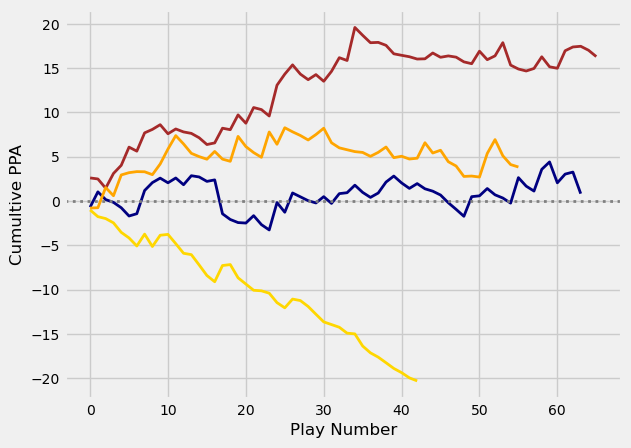

In [101]:
wvu_byplay = wvu.groupby('play_num')[['ppa']].sum().cumsum().reset_index()
bowl_byplay = bowl.groupby('play_num')[['ppa']].sum().cumsum().reset_index()
kent_byplay = kent.groupby('play_num')[['ppa']].sum().cumsum().reset_index()
ill_byplay = ill.groupby('play_num')[['ppa']].sum().cumsum().reset_index()

plt.plot(wvu_byplay['play_num'], wvu_byplay['ppa'], color='navy', linewidth=2)
plt.plot(bowl_byplay['play_num'], bowl_byplay['ppa'], color='brown', linewidth=2)
plt.plot(kent_byplay['play_num'], kent_byplay['ppa'], color='gold', linewidth=2)
plt.plot(ill_byplay['play_num'], ill_byplay['ppa'], color='orange', linewidth=2)
plt.ylabel('Cumultive PPA', fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel('Play Number', fontsize=12)
plt.xticks(fontsize=10)
plt.style.use('fivethirtyeight')
plt.axhline(y=0, color='grey', linestyle='dotted', linewidth=2)
plt.show()